<a href="https://colab.research.google.com/github/Abhi-0804/python-projects/blob/main/colorimagetosketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# -*- coding: utf-8 -*-
"""Convert_Color_Image_to_Sketch.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1vcd0PcYBJ-RtS_iYr262c4yVfofzkuAY
"""

#Install imageio package
!pip install imageio



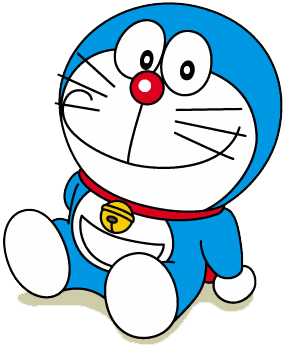

In [5]:
# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

#Display the image from the web using an URI.
img="https://upload.wikimedia.org/wikipedia/en/b/bd/Doraemon_character.png"
dp.Image(requests.get(img).content)



<ipython-input-6-ff933f6cf777>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  source_img = imageio.imread(img)


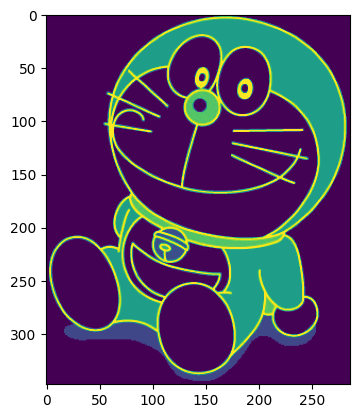

In [6]:
#Read the image using imgaeio package's imread method and URI from web using
source_img = imageio.imread(img)


# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying greyscale
import numpy as np

def grayscaleimg(rgb):
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gryscl_img = grayscaleimg(source_img)



#Invert the image by subtracting it from 255
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

<ipython-input-7-1c3f4d28fc51>:3: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


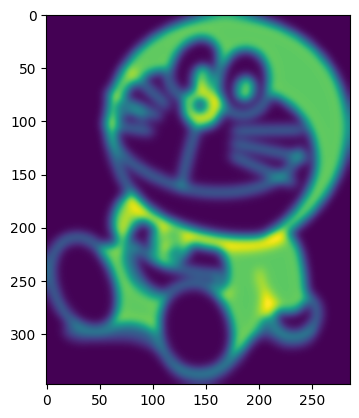

In [7]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

<ipython-input-8-d8e7ed9cb286>:3: RuntimeWarning: divide by zero encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)
<ipython-input-8-d8e7ed9cb286>:3: RuntimeWarning: invalid value encountered in divide
  resultant_dodge=blur_img*255/(255-gryscl_img)


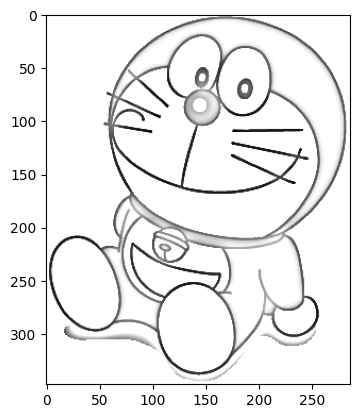

In [8]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gryscl_img):
    resultant_dodge=blur_img*255/(255-gryscl_img)
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gryscl_img==255]=255
    return resultant_dodge.astype('uint8')


#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gryscl_img)


#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")

In [9]:
#Save the image
plt.imsave('target_image.png', target_img, cmap='gray', vmin=0, vmax=255)


